##**Task 2 MOVIE RATE PREDICTION**

##**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
try:
    df = pd.read_csv('/content/IMDb_Movies.csv', encoding='latin1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/content/IMDb_Movies.csv', encoding='utf-16')
    except UnicodeDecodeError:
        df = pd.read_csv('/content/IMDb_Movies.csv', encoding='cp1252')

In [6]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
df.shape

(15509, 10)

##**Data Cleaning**

In [10]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [12]:
df.duplicated().sum()

6

In [13]:
df.dropna(inplace=True)

In [15]:
df.shape

(5659, 10)

In [16]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

##**Data Pre-Processing**

In [18]:
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [19]:
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))

In [20]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

In [25]:
df['Votes'] = pd.to_numeric(df['Votes'].astype(str).str.replace(',', ''), errors='coerce')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


##**Data Visualizing**

In [29]:
year = px.histogram(df, x = 'Genre', histnorm='probability density', nbins = 30)
year.show()

In [30]:
avg_rating_by_year = df.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

top_genres = df['Genre'].value_counts().head(10).index

average_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]

fig = px.line(avg_rating_by_year, x='Year', y='Rating', color = "Genre")

fig.update_layout(title='Average Rating by Year for Top Genres', xaxis_title='Year', yaxis_title='Average Rating')

fig.show()

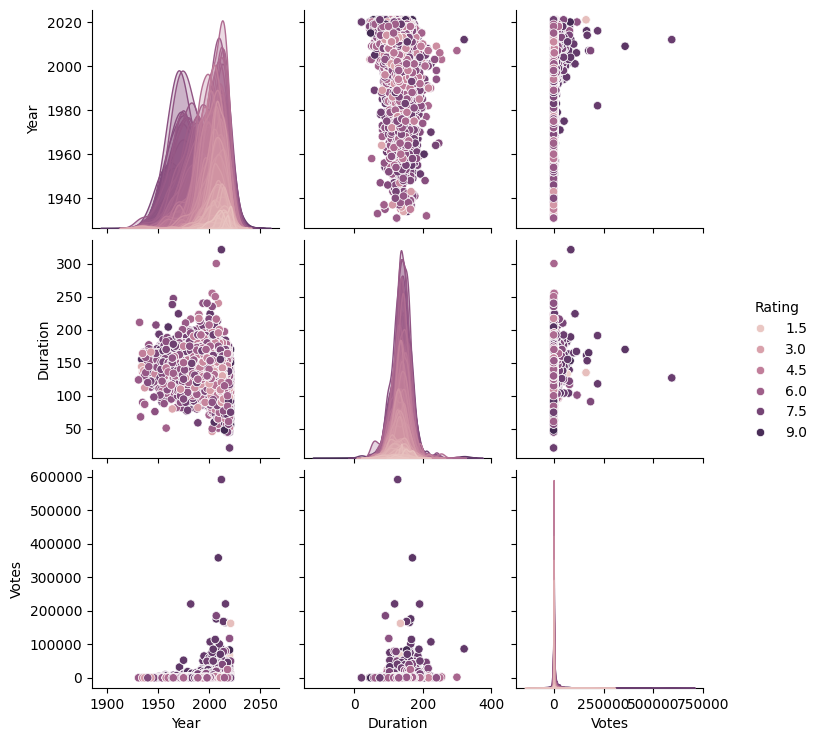

In [32]:
sns.pairplot(df,hue="Rating")
plt.show()

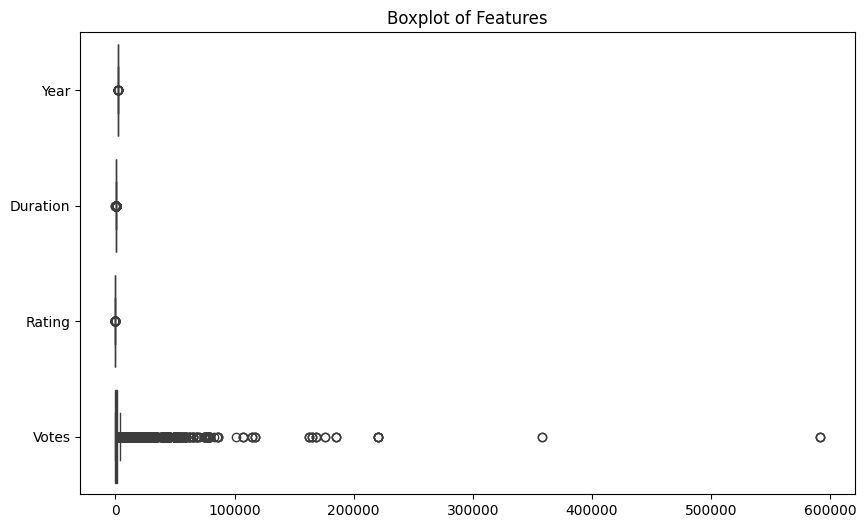

In [34]:
# Boxplot to check the distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient="h")
plt.title('Boxplot of Features')
plt.show()

##**Feature Engineering**

Importing essential libraries for model building

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [38]:
# Dropping Name column
df.drop('Name', axis = 1, inplace = True)

In [39]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [41]:
X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##**Model Buliding**

In [43]:
Model = LinearRegression()
Model.fit(X_train,y_train)
Model_pred = Model.predict(X_test)

In [44]:
print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, Model_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, Model_pred))
print('R2 score: ',r2_score(y_test, Model_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.4465441653985704
Mean absolute error:  0.4921902540765641
R2 score:  0.7641133663863862


##**Model Testing**

In [45]:
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.056744,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.751042,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.811087,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.751042,5.335135,4.793617,5.73,5.93
5,1997,827,147,6.056744,5.335135,4.793617,5.73,5.93


In [46]:
y.head()

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

Predicting New Data Points

In [50]:
data = {'Year': [2016], 'Votes': [46], 'Duration': [115], 'Genre_mean_rating': [5.8], 'Director_encoded': [4.5], 'Actor1_encoded': [5.3], 'Actor2_encoded': [2.5], 'Actor3_encoded': [3.5]}
trail = pd.DataFrame(data)

In [48]:
rating_predicted = Model.predict(trail)
print("Predicted Rating:", rating_predicted[0])

Predicted Rating: 4.207458962134328
